In [1]:
import math
from tensorboardX import SummaryWriter
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
from gym import envs
#print(envs.registry.all())

4
done
(84, 84, 4)


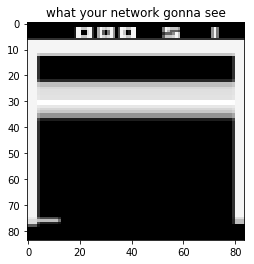

In [4]:
from wrappers import make_atari_deepmind
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
env_name1 = "PongNoFrameskip-v4"
env_name = "BreakoutNoFrameskip-v4"
env = make_atari_deepmind(env_name)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
obs = env.reset()
obs, r, done, _ = env.step(2)
#print(obs.shape)
#print(is_done)
done = False
for _ in range(2000):
    obs, _, done, _ = env.step(3)
    obs = np.array(obs)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
print (obs.shape)
plt.imshow(obs[:,:,0],interpolation='none',cmap='gray');

In [5]:

from dqnagent import DQNAgent
from dqnagent import ExperienceBuffer
import networks
EXP_BUFFER_CAPACITY = 100000

#agent.epsilon = 0.5

breakout_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 8,
    'BATCH_SIZE' : 32 * 2,
    'EPSILON' : 0.02,
    'MIN_EPSILON' : 0.02,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'DDDQN2',
    'IS_DOUBLE' : False,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 300,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'NETWORK' : networks.AtariDuelingDQN()
    }


pong_noisy_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 5,
    'BATCH_SIZE' : 32 * 5,
    'EPSILON' : 0.0,
    'MIN_EPSILON' : 0.00,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.0,
    'NAME' : 'DDDQN',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 300,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'NETWORK' : networks.AtariNoisyDuelingDQN()
    }
agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = breakout_dddqn_config)
agent.restore('nn/DDDQN2BreakoutNoFrameskip-v4')
#agent.epsilon = 0.02

INFO:tensorflow:Restoring parameters from nn/DDDQN2BreakoutNoFrameskip-v4


In [6]:
env.reset()
agent.train()

Frames per seconds:  457.15506450007877
Frames per seconds:  473.99649760736133
Frames per seconds:  475.3111112974645
3112
saving next best rewards:  13.6
Frames per seconds:  472.9771880037141
Frames per seconds:  474.7358440443928
5816
Frames per seconds:  470.76845303274575
Frames per seconds:  465.9742366253201
Frames per seconds:  469.88885032559347
Frames per seconds:  469.2756381697294
9104
Frames per seconds:  467.62302059231746
Frames per seconds:  453.9767111890221
Frames per seconds:  442.20087052645397
12112
Frames per seconds:  442.3168001025881
Frames per seconds:  437.84689726950114
Frames per seconds:  430.92497907689284
15016
Frames per seconds:  457.21860310982044
Frames per seconds:  460.0363856483877
17520
Frames per seconds:  455.18811179104625
Frames per seconds:  440.12545079682747
Frames per seconds:  441.4811471530845
20472
Frames per seconds:  448.2049325684267
Frames per seconds:  455.3656237334908
Frames per seconds:  463.74422103141006
23776
Frames per sec

Frames per seconds:  449.8898311029611
Frames per seconds:  451.79841298189683
Frames per seconds:  451.8875387952457
197664
Frames per seconds:  449.5108092869447
Frames per seconds:  453.3755819060262
Frames per seconds:  453.17102184603567
200272
Frames per seconds:  454.37398595225994
Frames per seconds:  450.3160465589179
Frames per seconds:  453.9888974530298
Frames per seconds:  454.58362442712416
204072
Frames per seconds:  453.9967107648738
Frames per seconds:  452.3141351725965
Frames per seconds:  452.3162813971182
207472
Frames per seconds:  454.29913028709973
Frames per seconds:  451.9122237598527
Frames per seconds:  449.12992470498136
210088
Frames per seconds:  451.6601453133265
Frames per seconds:  453.33427293760286
212208
Frames per seconds:  453.1903139266181
Frames per seconds:  450.06028804131415
Frames per seconds:  453.80032934384406
215752
saving next best rewards:  15.5
Frames per seconds:  452.66370150622265
Frames per seconds:  453.0669023509595
Frames per s

388352
Frames per seconds:  447.04713937746857
Frames per seconds:  444.10726456635604
Frames per seconds:  451.3531164620785
391184
Frames per seconds:  449.0335665198117
Frames per seconds:  453.02197980234376
393232
Frames per seconds:  456.64152417068794
Frames per seconds:  453.6510203379704
Frames per seconds:  456.81046985116944
396352
Frames per seconds:  456.14962363314567
Frames per seconds:  451.66919191103386
Frames per seconds:  454.30282081673914
399376
Frames per seconds:  454.1944918236298
Frames per seconds:  454.30606853242153
Frames per seconds:  454.6565039405586
402088
Frames per seconds:  458.4039496386751
Frames per seconds:  452.7757003373226
404568
Frames per seconds:  456.6376464027803
Frames per seconds:  453.06788115488723
Frames per seconds:  453.2998300519031
Frames per seconds:  452.9092233342566
408416
saving next best rewards:  18.2
Frames per seconds:  456.10155821229415
Frames per seconds:  455.8928961948202
410816
Frames per seconds:  453.21166443805

583096
Frames per seconds:  446.9004310028394
Frames per seconds:  446.06152182522715
585888
Frames per seconds:  444.7655818382524
Frames per seconds:  449.55383354594665
587752
Frames per seconds:  448.95935467573224
Frames per seconds:  448.41380569673044
Frames per seconds:  449.0146267100447
Frames per seconds:  439.47088774019574
591440
Frames per seconds:  449.2286337327615
Frames per seconds:  449.06048879592845
593896
Frames per seconds:  445.73448456413485
Frames per seconds:  449.1858641151675
Frames per seconds:  449.89977208446606
596760
Frames per seconds:  446.1112902115876
Frames per seconds:  449.39242669000396
598984
Frames per seconds:  448.8987633275222
Frames per seconds:  451.57451241508426
Frames per seconds:  448.6448996601499
601752
Frames per seconds:  452.4016103208259
Frames per seconds:  452.2307408574661
Frames per seconds:  450.13061319894643
604624
Frames per seconds:  449.1903860519038
Frames per seconds:  451.868746922177
606744
Frames per seconds:  45

779928
Frames per seconds:  451.9314088096748
Frames per seconds:  447.10070240036447
Frames per seconds:  449.89769698893946
Frames per seconds:  450.2341122835123
783248
Frames per seconds:  448.8985231088925
Frames per seconds:  451.0465532550694
785992
Frames per seconds:  450.24605011259627
Frames per seconds:  451.5913349413873
Frames per seconds:  448.0210420038954
Frames per seconds:  450.019194706424
789600
Frames per seconds:  450.07926787261425
Frames per seconds:  448.84481667826685
Frames per seconds:  446.8182592459588
792704
Frames per seconds:  451.1714871681457
Frames per seconds:  448.92552529256176
Frames per seconds:  450.5870044184191
Frames per seconds:  450.95072854873524
796216
Frames per seconds:  448.6927022222907
Frames per seconds:  451.61321582478416
Frames per seconds:  440.78048431895735
799416
Frames per seconds:  440.6898513247108
Frames per seconds:  442.73032288682316
Frames per seconds:  448.4973806935337
802904
Frames per seconds:  444.6045309910570

Frames per seconds:  427.7239677343694
Frames per seconds:  428.71534546596365
978680
Frames per seconds:  437.9977372801372
Frames per seconds:  438.05523837553653
Frames per seconds:  436.778453991318
981568
Frames per seconds:  435.73956547426667
Frames per seconds:  436.12749763417463
Frames per seconds:  436.6364978336321
984752
Frames per seconds:  436.4860941280537
Frames per seconds:  435.58462196560293
986976
Frames per seconds:  437.2515032428179
Frames per seconds:  433.359976393202
Frames per seconds:  433.5822201584166
Frames per seconds:  436.4196042042246
990056
Frames per seconds:  436.76103415933915
Frames per seconds:  436.6739558377015
Frames per seconds:  433.6139558574942
993632
Frames per seconds:  434.262730409689
Frames per seconds:  434.9364498547051
Frames per seconds:  438.09179624463263
996904
Frames per seconds:  438.43933182674726
Frames per seconds:  432.58781803832653
998496
Frames per seconds:  435.993170143306
Frames per seconds:  429.23639120434143
Fr

Frames per seconds:  437.58108851934713
Frames per seconds:  436.4571612548618
Frames per seconds:  435.4672206964209
1173680
Frames per seconds:  436.451484139666
Frames per seconds:  430.40923574444577
1175312
Frames per seconds:  435.61583711267247
Frames per seconds:  436.883548245572
Frames per seconds:  435.22998847253336
1178104
Frames per seconds:  436.00830788230087
Frames per seconds:  431.8585105894452
1180624
Frames per seconds:  433.3175336452773
Frames per seconds:  434.3057632670846
Frames per seconds:  440.3869160177713
1183080
Frames per seconds:  434.31026040055747
Frames per seconds:  433.05679178767423
Frames per seconds:  433.72053752630933
1186240
Frames per seconds:  435.0289728625487
Frames per seconds:  427.1617717720103
Frames per seconds:  431.29622165003576
1189760
Frames per seconds:  445.32327659429893
Frames per seconds:  444.116340306111
1191776
Frames per seconds:  444.17084957243975
Frames per seconds:  436.5900933708381
Frames per seconds:  436.602954

Frames per seconds:  437.3123193962733
Frames per seconds:  439.24339577768353
1367904
Frames per seconds:  442.0021223837721
Frames per seconds:  444.2621202265806
Frames per seconds:  443.46397444124045
1370608
Frames per seconds:  445.21814744929935
Frames per seconds:  445.0023723251927
1372968
Frames per seconds:  442.2421337427168
Frames per seconds:  442.7685533390817
Frames per seconds:  445.17807530584935
1375104
Frames per seconds:  442.91569466882834
Frames per seconds:  442.9182671218165
1377880
Frames per seconds:  442.69195886281796
Frames per seconds:  442.95975790001177
Frames per seconds:  443.04014208368204
Frames per seconds:  442.1522970381844
1381608
Frames per seconds:  441.1589796902771
Frames per seconds:  441.1363834045036
Frames per seconds:  439.9174894593697
1384656
Frames per seconds:  439.4094697715739
Frames per seconds:  436.7054637222871
Frames per seconds:  441.04769100297426
1387624
Frames per seconds:  440.80531416715377
Frames per seconds:  439.9710

1560440
Frames per seconds:  440.4632236714706
Frames per seconds:  441.0597032095757
1562176
Frames per seconds:  439.8884689823497
Frames per seconds:  435.2235303346662
Frames per seconds:  436.7824566555552
1565352
Frames per seconds:  434.32528150139325
Frames per seconds:  439.46011303176164
Frames per seconds:  435.0853811326877
1568464
Frames per seconds:  438.7982528014516
Frames per seconds:  441.18872494234404
1570784
Frames per seconds:  442.6874733696978
Frames per seconds:  443.60993626927393
Frames per seconds:  442.0746575618957
1573792
Frames per seconds:  438.7671766102368
Frames per seconds:  439.7805408803739
Frames per seconds:  432.3257252681534
Frames per seconds:  430.87951503371846
1577264
Frames per seconds:  434.3392241714524
Frames per seconds:  431.66508346052154
Frames per seconds:  433.67250875838135
1580416
Frames per seconds:  437.4893021591776
Frames per seconds:  434.79478686285125
Frames per seconds:  431.461887312463
Frames per seconds:  440.5541799

Frames per seconds:  432.8853868836565
Frames per seconds:  439.91259861786835
1756816
Frames per seconds:  441.12214011817093
Frames per seconds:  442.1163632545923
Frames per seconds:  440.94021319816915
1759328
Frames per seconds:  439.81415895518467
Frames per seconds:  441.0386011193829
Frames per seconds:  440.71439311543475
Frames per seconds:  440.31068102223196
1763184
Frames per seconds:  440.93367719602486
Frames per seconds:  440.5727366585936
1765312
Frames per seconds:  441.54165823615523
Frames per seconds:  440.0172679048293
Frames per seconds:  442.65280731191706
Frames per seconds:  441.815745850272
1769488
Frames per seconds:  438.16090224935544
Frames per seconds:  442.52502896936176
Frames per seconds:  439.54042954889275
Frames per seconds:  440.6950372866753
1773024
Frames per seconds:  436.98054368983424
Frames per seconds:  439.2008046195466
1775136
Frames per seconds:  440.16882199777876
Frames per seconds:  441.3070495848395
Frames per seconds:  441.679752525

Frames per seconds:  439.83159257306846
Frames per seconds:  437.5890777169271
Frames per seconds:  437.0116405044795
1951736
Frames per seconds:  435.864858848839
Frames per seconds:  436.2761113494819
Frames per seconds:  439.14599101020025
1954656
Frames per seconds:  437.1156625928439
Frames per seconds:  435.3336610381156
Frames per seconds:  436.9003862236147
1957568
Frames per seconds:  436.36475618507933
Frames per seconds:  438.24683461706803
Frames per seconds:  437.5554794009659
Frames per seconds:  439.5150050906274
Frames per seconds:  438.1272160694334
1962024
Frames per seconds:  440.39080013229665
Frames per seconds:  439.2008966001885
Frames per seconds:  437.7450396144115
1965672
Frames per seconds:  439.03874858950445
Frames per seconds:  438.4806294260439
Frames per seconds:  435.3977865665331
1968832
Frames per seconds:  438.2759136669478
Frames per seconds:  437.5404622570987
Frames per seconds:  436.4337270767938
1971808
Frames per seconds:  440.42705517203865
Fr

Frames per seconds:  431.66472805549444
Frames per seconds:  436.4890012535921
2144216
Frames per seconds:  437.06355427166875
Frames per seconds:  433.0627386434844
Frames per seconds:  435.90014598582627
2147304
Frames per seconds:  434.7295321129796
Frames per seconds:  435.3495663842324
Frames per seconds:  434.58503194134255
2150944
Frames per seconds:  432.5569014999891
Frames per seconds:  434.0610348655936
Frames per seconds:  436.1703112256215
2153464
Frames per seconds:  430.2099116297599
Frames per seconds:  429.76649918873875
2155992
Frames per seconds:  420.8912292785801
Frames per seconds:  410.69749279226244
Frames per seconds:  407.9930492517168
2158824
Frames per seconds:  421.76177255012533
Frames per seconds:  417.4660967748453
Frames per seconds:  422.3761781794771
2161848
Frames per seconds:  423.64263636915484
Frames per seconds:  410.4876796071505
Frames per seconds:  418.6308987096443
2164720
Frames per seconds:  422.6272369457047
Frames per seconds:  417.363656

2337712
Frames per seconds:  424.5878688428339
Frames per seconds:  422.2013496780722
Frames per seconds:  425.0681640737429
2340728
Frames per seconds:  424.8090776558316
Frames per seconds:  418.71377138028265
Frames per seconds:  416.77740343841276
Frames per seconds:  416.52414443462186
2344576
Frames per seconds:  418.5612575487001
Frames per seconds:  422.01655967937114
Frames per seconds:  433.5414367456277
2347568
Frames per seconds:  435.13453594252655
Frames per seconds:  434.2157951991678
Frames per seconds:  434.0304014500573
2350664
Frames per seconds:  435.3173502283175
Frames per seconds:  435.39765097466363
Frames per seconds:  433.9179213837854
2353168
Frames per seconds:  422.86635830779414
Frames per seconds:  425.2573183010934
Frames per seconds:  425.48064974321863
2356056
Frames per seconds:  422.0941092955313
Frames per seconds:  419.734119608949
Frames per seconds:  434.3671121972609
2359496
Frames per seconds:  435.27343910935855
Frames per seconds:  431.252231

Frames per seconds:  434.20487207982416
2532080
Frames per seconds:  433.91410571756785
Frames per seconds:  433.505589532622
Frames per seconds:  432.4471009843387
2535432
Frames per seconds:  431.91134205125513
Frames per seconds:  432.38183579484814
Frames per seconds:  431.59734495289456
2538504
Frames per seconds:  432.5510577447841
Frames per seconds:  432.62235342292524
Frames per seconds:  434.6122760261453
2541864
Frames per seconds:  433.4061445593026
Frames per seconds:  433.8957465678013
Frames per seconds:  432.6113764626135
Frames per seconds:  432.6216840801293
2545760
Frames per seconds:  434.8578069306997
Frames per seconds:  436.5099882148764
Frames per seconds:  432.81632695180184
Frames per seconds:  435.97345640046115
2549792
Frames per seconds:  436.6064542495311
Frames per seconds:  432.71090342126337
Frames per seconds:  436.2868212546779
2552904
Frames per seconds:  431.5203043674632
Frames per seconds:  434.5018798043992
Frames per seconds:  433.15898415986106

Frames per seconds:  437.96105791359366
2727264
Frames per seconds:  436.25600900656707
Frames per seconds:  433.5405404930489
Frames per seconds:  431.44972648028784
2730496
Frames per seconds:  436.3273965969138
Frames per seconds:  437.2890668454341
Frames per seconds:  433.7020602146597
Frames per seconds:  435.9649369897545
2734008
Frames per seconds:  431.72586632784373
Frames per seconds:  434.73651631926543
Frames per seconds:  434.4090409359935
2737312
Frames per seconds:  433.2858860792773
Frames per seconds:  432.96872590276314
Frames per seconds:  434.03408441796046
Frames per seconds:  426.18825405034937
2741256
Frames per seconds:  429.57340123528735
Frames per seconds:  422.5310171097548
2743832
Frames per seconds:  426.10127105919435
Frames per seconds:  425.52234814498286
Frames per seconds:  428.4905761380943
2746120
Frames per seconds:  425.28573398551254
Frames per seconds:  426.5462145699416
Frames per seconds:  426.30525431422376
2749336
Frames per seconds:  428.2

Frames per seconds:  413.85821301990006
Frames per seconds:  423.7914684855979
2923408
Frames per seconds:  417.76568728928964
Frames per seconds:  411.2511895907063
2925992
Frames per seconds:  415.97382391281405
Frames per seconds:  417.8439717922962
Frames per seconds:  418.0932541545629
Frames per seconds:  418.7603415774419
2929064
Frames per seconds:  418.4887166897048
2930504
Frames per seconds:  418.2319146254493
Frames per seconds:  418.35485151224714
Frames per seconds:  404.38006155502654
2933104
Frames per seconds:  433.2010826556751
Frames per seconds:  433.26556603427633
2935760
Frames per seconds:  434.45300282218614
Frames per seconds:  432.0437888009058
2937768
Frames per seconds:  433.1933423608111
Frames per seconds:  433.61431447950775
Frames per seconds:  435.58353630186474
2940680
Frames per seconds:  438.6011748932935
Frames per seconds:  429.0573309576287
Frames per seconds:  435.4963389913643
2943960
Frames per seconds:  432.96327325414074
Frames per seconds:  

3117856
Frames per seconds:  426.7032149360124
Frames per seconds:  423.45675385265724
Frames per seconds:  426.2373681455476
Frames per seconds:  426.18691158410746
3121144
Frames per seconds:  431.4040185344229
Frames per seconds:  424.00769021821264
Frames per seconds:  419.76314624602924
3124208
Frames per seconds:  425.5863361174038
Frames per seconds:  424.98581456803333
Frames per seconds:  413.227402143681
3127528
Frames per seconds:  410.3493684756342
Frames per seconds:  416.2409949999127
3129808
Frames per seconds:  412.2607728985218
Frames per seconds:  427.0159541104128
Frames per seconds:  432.13130069821136
Frames per seconds:  431.6388294893951
3133448
Frames per seconds:  427.27290878618874
Frames per seconds:  425.8915149956967
Frames per seconds:  430.22818083701117
Frames per seconds:  427.21907365368776
3137680
Frames per seconds:  426.13447540745267
Frames per seconds:  427.71227838889996
Frames per seconds:  426.240746779824
3140816
Frames per seconds:  424.21409

Frames per seconds:  427.40901504749763
3314184
Frames per seconds:  425.4377080692502
Frames per seconds:  425.21713750255856
3316328
Frames per seconds:  427.9778887995264
Frames per seconds:  424.47997129047434
Frames per seconds:  428.4658886600634
3319872
Frames per seconds:  423.8135646483057
Frames per seconds:  402.3118304580929
3321984
Frames per seconds:  400.15119543421844
Frames per seconds:  400.97573249725343
Frames per seconds:  419.71769676343456
Frames per seconds:  425.0000683963409
Frames per seconds:  425.2257162415123
3326088
Frames per seconds:  425.9652608563759
Frames per seconds:  422.76666312202747
Frames per seconds:  423.54240378135165
3329640
Frames per seconds:  419.12862738828045
Frames per seconds:  420.7921253969972
Frames per seconds:  417.749126864023
3332408
Frames per seconds:  425.6116862022207
Frames per seconds:  432.2788513882731
Frames per seconds:  429.7167445732215
Frames per seconds:  427.73539599573235
Frames per seconds:  428.6465143824805

Frames per seconds:  404.11438402266424
3510288
Frames per seconds:  405.4512517424247
Frames per seconds:  412.5115905978565
Frames per seconds:  426.05491484344327
3513520
Frames per seconds:  423.0698584573796
Frames per seconds:  421.90440524189796
Frames per seconds:  424.30957827150183
3516272
Frames per seconds:  429.61251739092717
Frames per seconds:  430.0230282479226
Frames per seconds:  432.0199806604215
3519376
Frames per seconds:  427.56207483261915
Frames per seconds:  413.4235623508237
Frames per seconds:  424.0512868730557
Frames per seconds:  430.061123928501
3523304
Frames per seconds:  430.18440794033734
Frames per seconds:  426.3594227955034
3525920
Frames per seconds:  422.51824785900317
Frames per seconds:  422.0143516738639
Frames per seconds:  421.9928672880331
3528872
Frames per seconds:  423.30986559422485
Frames per seconds:  422.2024971558257
Frames per seconds:  425.6337998154097
Frames per seconds:  423.0787348542688
3532248
Frames per seconds:  418.911661

KeyboardInterrupt: 

In [7]:
#agent.epsilon = 0.2
#agent.train()
import wrappers

In [16]:
env_monitor.close()
print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=10000):
    rewards = []
    env._max_episode_steps = 1000
    print('reset')
    #env = env.old_env
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        reward += r
        rewards.append(reward)
        
            
        if done:
            
            break       
        
    return np.mean(rewards)


class ReallyDone(gym.Wrapper):
    def __init__(self, env):
        """Make end-of-life == end-of-episode, but only reset on true game over.
        Done by DeepMind for the DQN and co. since it helps value estimation.
        """
        self.old_env = env
        gym.Wrapper.__init__(self, env)
        self.lives = 0
        self.was_real_done  = True

    def step(self, action):
        old_lives = self.env.unwrapped.ale.lives()
        obs, reward, done, info = self.env.step(action)
        lives = self.env.unwrapped.ale.lives()
        if old_lives > lives:
            print('lives:', lives)
            obs, _, done, _ = self.env.step(1)
        done = lives == 0
        return obs, reward, done, info

import gym.wrappers
env_monitor = wrappers.make_atari_deepmind(env_name)
env_monitor = ReallyDone(env_monitor)
env_monitor = gym.wrappers.Monitor(env_monitor,directory='video_dddqn3',force=True, write_upon_reset=True)
sessions = [evaluate(env_monitor) for _ in range(1)]
env_monitor.close()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']
reset


In [ ]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
#env.reset()
#agent.train()

In [ ]:
from dqnagent import ExperienceBuffer
from dqnagent import Experience
import wrappers
import gym
import time
env = None
def play_step(buf, env, curr_state):
    action = env.action_space.sample()
    
    # do step in the environment
    new_state, reward, is_done, _ = env.step(action)
    exp = [curr_state, action, reward, is_done, new_state]
    curr_state = new_state
    buf.append(exp)
    if is_done:
        curr_state = env.reset() 
    return curr_state

def do_test():
    buf = None
    buf = ExperienceBuffer(100000)
    frame = 0
    dt = 0
    env = wrappers.wrap_deepmind("BreakoutNoFrameskip-v4")
    curr_state = env.reset() 
    while True:
        frame += 1
        t1 = time.time()
        curr_state = play_step(buf, env, curr_state)
        t2 = time.time()
        dt += t2 - t1
        
        if frame % 10000 == 0 and frame != 0:
            print(dt)
            print(frame)
            dt = 0
            
        

In [ ]:
do_test()